/var/folders/5g/hyv5_r417lgcw4q4fw84b9nw0000gn/T/ipykernel_72081/2338780872.py:44: RuntimeWarning: invalid value encountered in divide
  C /= C.sum(axis=1)[:, np.newaxis]


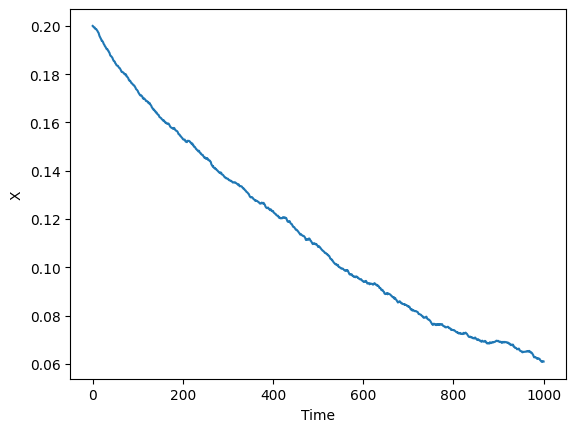

In [3]:
# Code from
# https://gist.github.com/Geometrein/bc15807e5e9dd2e94fe60e2c7a4cd030

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)

from fg.functions import pairwise_difference_matrix

def hopf(x, y, a, omega, beta = 0.):
    """
    Hopf equation from Equation 2 and 3 of Deco et. al (2019)
    "Awakening: Predicting external stimulation to force transitions between 
    different brain states"
    """
    noise = np.random.normal(0, beta)
    dx = (a - x**2 - y**2)*x - omega*y + noise
    dy = (a - x**2 - y**2)*y + omega*x + noise
    
    return dx, dy

# Constants
dt = 0.01
x_init = 0.2
y_init = 0.2
T = 10
n_regions = 1

times = np.arange(0, T + dt, dt)
X = np.zeros((n_regions, len(times)))
Y = np.zeros((n_regions, len(times)))
X[0] = x_init
Y[0] = y_init

a = np.full((n_regions, ), -0.02)
omega = np.full((n_regions, ), 0.04)
beta = 0.02
G = 0.8

# Generate a random symmetric connectivity matrix
C = pd.read_csv('./fmri/DTI_fiber_consensus_HCP.csv', header=None).to_numpy()[:n_regions, :n_regions]
C /= C.sum(axis=1)[:, np.newaxis]
np.fill_diagonal(C, 0)

for t in range(len(times)-1):
    X_coupling = G * np.sum(C @ pairwise_difference_matrix(X[:, t]), axis=0)
    Y_coupling = G * np.sum(C @ pairwise_difference_matrix(Y[:, t]), axis=0)

    dX, dY = hopf(X[:, t], Y[:, t], a, omega, beta)
    X[:, t+1] = X[:, t] + dt * (dX + X_coupling)
    Y[:, t+1] = Y[:, t] + dt * (dY + Y_coupling)

# Fig. 1: X as a function of time
plt.figure()
# plt.plot(X[0])
plt.plot(X[0])
# plt.plot(X[3])
# plt.plot(X[4])
plt.xlabel("Time")
plt.ylabel("X")
plt.show()


Text(0, 0.5, 'X')

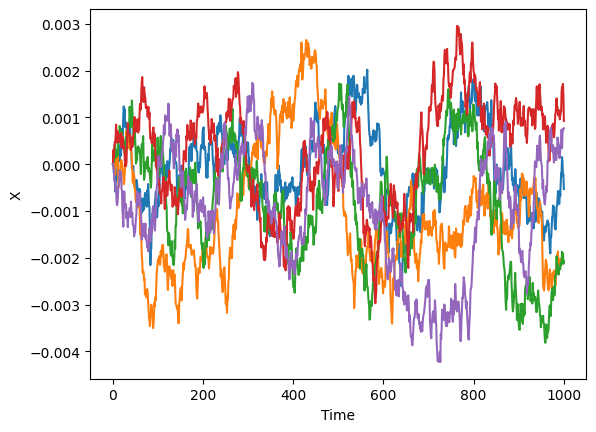

In [87]:
# Code from
# https://gist.github.com/Geometrein/bc15807e5e9dd2e94fe60e2c7a4cd030

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)

def hopf(x, y, a, omega, beta = 0.):
    """
    Hopf equation from Equation 2 and 3 of Deco et. al (2019)
    "Awakening: Predicting external stimulation to force transitions between 
    different brain states"
    """
    noise = np.random.normal(0, beta)
    dx = (a - x**2 - y**2)*x - omega*y + noise
    dy = (a - x**2 - y**2)*y + omega*x + noise
    
    return dx, dy

# Constants
dt = 0.01
T = 10
n_regions = 100

times = np.arange(0, T + dt, dt)
X = np.zeros((n_regions, len(times)))
Y = np.zeros((n_regions, len(times)))

a = np.full((n_regions, ), -0.02)
omega = np.full((n_regions, ), 0.04)
beta = 0.02
G = 0.8

# Generate a random symmetric connectivity matrix
C = pd.read_csv('./fmri/DTI_fiber_consensus_HCP.csv', header=None).to_numpy()[:n_regions, :n_regions]
C /= C.sum(axis=1)[:, np.newaxis]
np.fill_diagonal(C, 0)

for t in range(len(times)-1):
    for n in range(n_regions):
        x_coupling = 0
        y_coupling = 0
        for p in range(n_regions):
            x_coupling += C[n,p]*(X[p, t] - X[n, t])
            y_coupling += C[n,p]*(Y[p, t] - Y[n, t])

        dx, dy = hopf(X[n, t], Y[n, t], a = a[n], omega = omega[n], beta = beta)

        X[n, t+1] = X[n, t] + dt * (dx + G * x_coupling)
        Y[n, t+1] = Y[n, t] + dt * (dy + G * y_coupling)

# Fig. 1: X as a function of time
plt.figure()
plt.plot(X[0])
plt.plot(X[1])
plt.plot(X[2])
plt.plot(X[3])
plt.plot(X[4])
plt.xlabel("Time")
plt.ylabel("X")

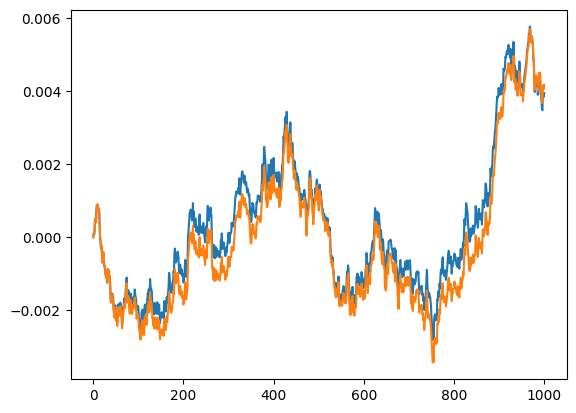

In [73]:
import numpy as np

np.random.seed(42)

T = 10
dt = 0.01

a = -0.02
omega = 0.1
beta = 0.02

X = np.zeros(len(times))
Y = np.zeros(len(times))

for t in range(len(times) - 1):
    noise = np.random.normal(0, beta)
    X[t+1] = X[t] + dt * ((a - X[t]**2 - Y[t]**2) * X[t] - omega * Y[t] + noise)
    Y[t+1] = Y[t] + dt * ((a - X[t]**2 - Y[t]**2) * Y[t] + omega * X[t] + noise)

plt.plot(X)
plt.plot(Y)